In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [15]:
#load dataset
dta = sm.datasets.fair.load_pandas().data
dta.to_csv('affairs.csv')
#add 'affairs' column 1 representing having affairs , 0 represents not
dta['affair']=(dta.affairs>0).astype(int)
dta.to_csv('affairs12.csv')

In [16]:
dta.sample(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
4686,5.0,22.0,0.5,0.0,2.0,12.0,3.0,1.0,0.000000,0
597,5.0,27.0,6.0,0.0,2.0,16.0,3.0,5.0,2.041666,1
5879,5.0,37.0,16.5,2.0,4.0,16.0,4.0,6.0,0.000000,0
1994,4.0,32.0,16.5,3.0,4.0,14.0,3.0,4.0,4.072726,1
5940,2.0,22.0,2.5,1.0,3.0,12.0,3.0,4.0,0.000000,0
110,4.0,22.0,0.5,0.0,2.0,12.0,3.0,2.0,7.000000,1
2936,5.0,22.0,2.5,2.0,3.0,14.0,5.0,4.0,0.000000,0
5319,5.0,37.0,16.5,5.5,2.0,12.0,3.0,5.0,0.000000,0
5545,4.0,32.0,16.5,2.0,2.0,14.0,3.0,4.0,0.000000,0
2106,5.0,42.0,23.0,5.5,1.0,14.0,3.0,3.0,0.000000,0


In [18]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [19]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


# Data visualization

In [20]:
# show plots in the notebook
%matplotlib inline


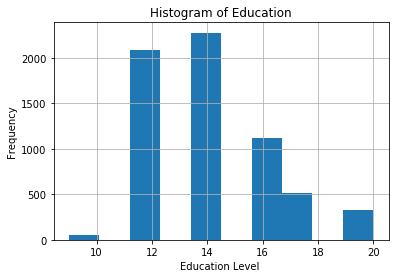

In [21]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level ')
plt.ylabel('Frequency')

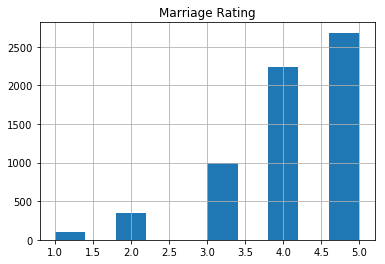

In [25]:
dta.rate_marriage.hist()
plt.title('Marriage Rating')


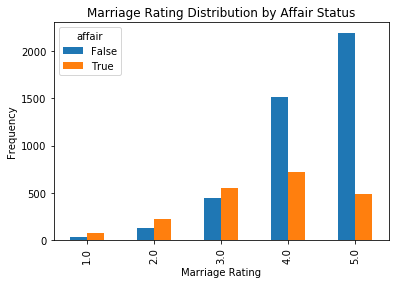

In [26]:
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

affairs      False  True 
yrs_married              
0.5            354     16
2.5           1595    439
6.0            754    387
9.0            348    254
13.0           347    243
16.5           449    369
23.0           466    345


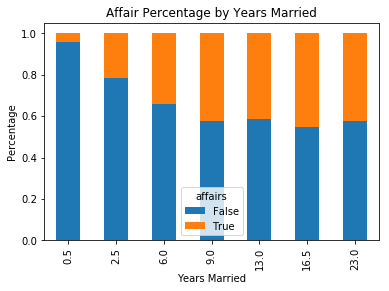

In [28]:
affair_yrs_married = pd.crosstab(dta.yrs_married,dta.affairs.astype(bool))
print(affair_yrs_married)
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [30]:
y,X=dmatrices('affair~rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',dta,return_type='dataframe')
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [31]:
print(type(y))
y= np.ravel(y)
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [34]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)

0.72588752748978946

In [35]:
y.mean()

0.32249450204209867

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predicted = model2.predict(X_test)
print((predicted))

[ 1.  0.  0. ...,  0.  0.  0.]


In [39]:
probs=model2.predict_proba(X_test)
print(probs)

[[ 0.35142463  0.64857537]
 [ 0.90952591  0.09047409]
 [ 0.72576585  0.27423415]
 ..., 
 [ 0.55736688  0.44263312]
 [ 0.81213955  0.18786045]
 [ 0.74729605  0.25270395]]


In [40]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
#compute area under the reciever operating characteristics curve (ROC AUC)from predictions score
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.729842931937
0.745963250438


In [41]:
print(metrics.confusion_matrix(y_test,predicted))

[[1169  134]
 [ 382  225]]


In [45]:
scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
0.724163068551


In [ ]:
y,X=dmatrices('affair~rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',dta,return_type='dataframe')
print(X.columns) 3, 3,1,4,16,4,2

In [49]:
myvals=np.array([1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]).reshape(1,-1)
model2.predict(myvals)

array([ 0.])

In [50]:
myvals=np.array([1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]).reshape(1,-1)
model2.predict_proba(myvals)


array([[ 0.773065,  0.226935]])